In [20]:
#Importing the necessary libraries
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import time
import urllib.request
import requests
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Set Variables

In [6]:
CLIENT_ID='x'
CLIENT_SECRET='x'

Obtaining and calculating values for Brisbane Hotels

In [7]:
# approximate radius of earth in km
R = 6373.0

VERSION='20200213'
clat  = -27.4698
clng  = 153.0251
clat1 = radians(clat)
clng1 = radians(clng)

radius=10000
LIMIT=50
query='hotel'

# The following URL helps with fetching the API from Foursquare. {} corresponds to each variable mentioned later in the line.
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
CLIENT_ID, CLIENT_SECRET, VERSION, clat, clng, radius, LIMIT, query)

# Obtaining all information using for loop to obtain id, name, category, and co-ordinates.
results = requests.get(url).json()

venue_data=results["response"]['groups'][0]['items']
venue_details=[]
for row in venue_data:
    try:
        venue_id      = row['venue']['id']
        venue_name    = row['venue']['name']
        venue_category= row['venue']['categories'][0]['name']
        venue_lat     = row['venue']['location']['lat']
        venue_lng     = row['venue']['location']['lng']
        venue_details.append([venue_id,venue_name,venue_category,venue_lat,venue_lng])
    except KeyError:
        pass

# Creation of rating and distance columns in the dataframe.
column_names=['ID','Name','Category','Lat','Lng']
df_bris = pd.DataFrame(venue_details,columns=column_names)
df_bris['rating']   = np.nan
df_bris['distance'] = np.nan

# Dataframe organization and some math to calculate rating and dataframe using trigonometry and premium calls.
for index, row in df_bris.iterrows():
    venue_id   = str(row[0])
    venue_name = row[1]
    venue_lat  = row[3]
    venue_lng  = row[4]
    
    #calculate distance between the target and central
    venue_lat2 = radians(venue_lat)
    venue_lng2 = radians(venue_lng)
    
    dlat = venue_lat2 - clat1
    dlon = venue_lng2 - clng1
    
    a = sin(dlat / 2)**2 + cos(clat1) * cos(venue_lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c    
              
    url1 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
 
    try:
       results1 = requests.get(url1).json()
       venue_rating=results1['response']['venue']['rating']
       df_bris.loc[index,'rating']  = venue_rating  
       df_bris.loc[index,'distance'] = distance *1000
    except:
        print(results1)

df_bris.to_pickle('pickle.dat')        
df_bris.head(30)

,ID,Name,Category,Lat,Lng,rating,distance
0,530d2f55498e054d122f909c,NEXT Hotel Brisbane,Hotel,-27.470371,153.024093,8.2,117.939192
1,5a68151de65d0c5c76a4c425,W Brisbane,Hotel,-27.470120,153.021970,8.8,310.940438
2,4b104ba6f964a520326d23e3,Brisbane Marriott Hotel,Hotel,-27.463283,153.031880,8.0,986.480656
3,54bc82d7498e61f57b2faf6d,Capri by Fraser,Hotel,-27.472153,153.027570,8.1,357.608354
4,50a6bdc8e4b04ec265edcf83,Punthill Apartment Hotels,Hotel,-27.463598,153.025617,8.1,691.789260
5,529e904f498ee9412cd3aa15,Four Points by Sheraton Brisbane,Hotel,-27.471679,153.027955,8.1,350.771113
6,522ae55d11d2b45ff7229ba8,Meriton Serviced Apartments,Residential Building (Apartment / Condo),-27.467566,153.019332,8.3,621.141105
7,4b058730f964a520578322e3,Hilton,Hotel,-27.469173,153.026773,7.8,179.198073
8,5704bf47498e0bf50c64b0a8,Ibis Styles Brisbane Elizabeth Street,Hotel,-27.471443,153.024448,7.8,193.780136
9,4c5901a5ec2520a15e294e12,Stamford Plaza,Hotel,-27.471347,153.030489,7.9,558.950650


The following code below is just the same thing as the one above, except that it focuses on the city of Melbourne instead. 

In [13]:

# The only thing that this section of code is different than the previous one are the co-ordinates below.
VERSION='20200213'
clat  = -37.8136
clng  = 144.9631
clat1 = radians(clat)
clng1 = radians(clng)

radius=10000
LIMIT=50
query='hotel'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
CLIENT_ID, CLIENT_SECRET, VERSION, clat, clng, radius, LIMIT, query)

results = requests.get(url).json()

venue_data=results["response"]['groups'][0]['items']
venue_details=[]
for row in venue_data:
    try:
        venue_id      = row['venue']['id']
        venue_name    = row['venue']['name']
        venue_category= row['venue']['categories'][0]['name']
        venue_lat     = row['venue']['location']['lat']
        venue_lng     = row['venue']['location']['lng']
        venue_details.append([venue_id,venue_name,venue_category,venue_lat,venue_lng])
    except KeyError:
        pass

column_names=['ID','Name','Category','Lat','Lng']
df_melb = pd.DataFrame(venue_details,columns=column_names)
df_melb['rating']   = np.nan
df_melb['distance'] = np.nan

for index, row in df_melb.iterrows():
    venue_id   = str(row[0])
    venue_name = row[1]
    venue_lat  = row[3]
    venue_lng  = row[4]
    
    #calculate distance between the target and central
    venue_lat2 = radians(venue_lat)
    venue_lng2 = radians(venue_lng)
    
    dlat = venue_lat2 - clat1
    dlon = venue_lng2 - clng1
    
    a = sin(dlat / 2)**2 + cos(clat1) * cos(venue_lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c    
              
    url1 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
 
    try:
       results1 = requests.get(url1).json()
       venue_rating=results1['response']['venue']['rating']
       df_melb.loc[index,'rating']  = venue_rating  
       df_melb.loc[index,'distance'] = distance *1000
    except:
        print(results1)
      
df_melb.head(30)

,ID,Name,Category,Lat,Lng,rating,distance
0,4b058743f964a520678722e3,Grand Hyatt Melbourne,Hotel,-37.815213,144.969658,9.0,603.561917
1,4b058743f964a520668722e3,Sofitel Melbourne on Collins,Hotel,-37.814043,144.972764,8.7,850.650309
2,4b1df30ff964a520731624e3,The Langham,Hotel,-37.820370,144.965710,8.4,787.174434
3,4b058743f964a5206e8722e3,Crown Towers,Hotel,-37.823437,144.958086,8.7,1179.499552
4,4b72207cf964a520ff6f2de3,InterContinental Melbourne The Rialto,Hotel,-37.818573,144.957823,8.1,721.830198
5,4b7a0a01f964a52036202fe3,Crown Metropol Hotel,Hotel,-37.825464,144.957547,8.5,1406.942931
6,4b14bf13f964a5203da623e3,Crown Promenade Hotel,Hotel,-37.823618,144.960179,8.1,1143.438570
7,5050489fe4b0eacd3df3987a,Ovolo Laneways,Hotel,-37.810538,144.971875,8.0,842.961432
8,4bf4a446d2fbef3b79d1a4c5,The Blackman,Hotel,-37.839350,144.975667,8.3,3069.662973
9,4c2c1e548ef52d7fd98b32ba,Citadines on Bourke Melbourne,Hotel,-37.813208,144.969320,7.7,548.268670


In [14]:
# Combining the Brisbane and Melbourne dataframes together. 
frames = [df_bris,df_melb]
df_bris_melb = pd.concat(frames)
df_bris_melb

,ID,Name,Category,Lat,Lng,rating,distance
0,530d2f55498e054d122f909c,NEXT Hotel Brisbane,Hotel,-27.470371,153.024093,8.2,117.939192
1,5a68151de65d0c5c76a4c425,W Brisbane,Hotel,-27.470120,153.021970,8.8,310.940438
2,4b104ba6f964a520326d23e3,Brisbane Marriott Hotel,Hotel,-27.463283,153.031880,8.0,986.480656
3,54bc82d7498e61f57b2faf6d,Capri by Fraser,Hotel,-27.472153,153.027570,8.1,357.608354
4,50a6bdc8e4b04ec265edcf83,Punthill Apartment Hotels,Hotel,-27.463598,153.025617,8.1,691.789260
...,...,...,...,...,...,...,...
45,4b0b4cd4f964a520193023e3,Skinny Dog Hotel,Hotel,-37.806829,145.030393,7.4,5961.282934
46,5689ad10498e21935518df2d,Peppers Docklands,Hotel,-37.814581,144.947084,6.8,1411.571617
47,4c6915f91a6620a11f92628c,Classico,Pizza Place,-37.839394,144.975683,7.7,3074.666682
48,54c59752498e10a9910b75b7,Wyndham On William,Hotel,-37.814545,144.957684,6.6,487.348755


Graph plotting and Model creation

In [15]:
X = df_bris_melb
y = df_bris_melb.rating

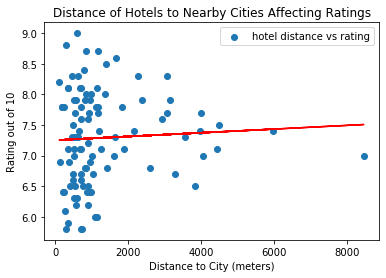

In [21]:
X=df_bris_melb['distance']
y=df_bris_melb['rating']
X1=X.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X1, y)

import matplotlib.pyplot as plt
plt.scatter(X1, y, label='hotel distance vs rating')
Y_pred = model.predict(X1)  
plt.plot(X, Y_pred, color='red')
plt.legend()
plt.title('Distance of Hotels to Nearby Cities Affecting Ratings')
plt.xlabel("Distance to City (meters)")
plt.ylabel("Rating out of 10")
plt.show()

In [17]:
# Training models from 500 meters, 1km and 5km.
z=np.array([500,1000,5000])
z=pd.Series(z)
z=z.values.reshape(-1,1)
pp= model.predict(z)
pp

array([7.26656969, 7.28167562, 7.40252302])

In [22]:
# Calculating correlation co-efficient
model.score(X1,y)

0.0028922398935453675